# Assignment 1: Color Spaces, Morphological Operators

## Exercise 1.1

For an image of your choice, implement the simple binarization method as shown in the lecture. We've put some example images in in /images.

Rough sketch:

1. define the „positive“ subspace P in the RGB cube
2. iterate over all pixels in I and check if in P or ~P
3. write result to new image
4. play around with size and shape of P and display binary image (**RESULT**)



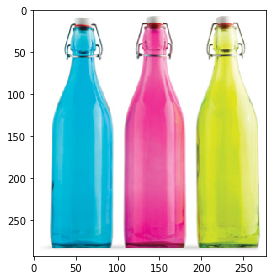

In [7]:
%matplotlib inline 
from skimage import io, data, color
import numpy as np
import cv2

image = io.imread('images/bottles.png')
io.imshow(image)

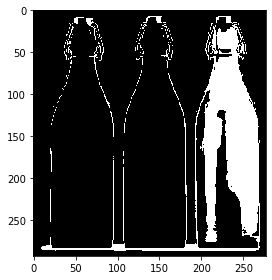

In [8]:
lowe_bound=np.array([200, 200,0])
upper_bound=np.array([255,255, 250])
binary_output = cv2.inRange(image, lowe_bound, upper_bound)
io.imshow(binary_output)

## Exercise 1.2

* starting from the binary color detection image
* erase noise with an erosion operation
* dilate once to get original size of object
* find connected components with one-pass algorithm
* extract bounding box on the fly
* draw bounding box on original image (**RESULT**)

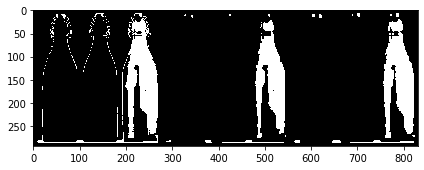

In [12]:
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(binary_output,kernel,iterations = 1)
dilation = cv2.dilate(erosion,kernel,iterations = 1)
io.imshow(np.hstack([binary_output,erosion,dilation]))

C:\Users\wessa\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


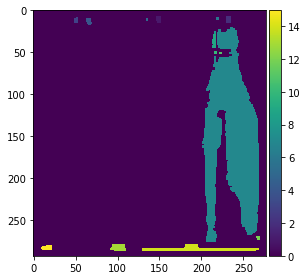

In [13]:
labeled_components=np.copy(dilation)
ret, labels = cv2.connectedComponents(labeled_components)
io.imshow(labels)

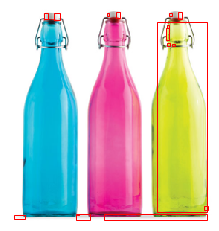

In [66]:
import matplotlib.pyplot as plt   
from matplotlib.patches import Rectangle

label_ids=np.unique(labels)
fig, ax = plt.subplots(1)
ax.axis('off')
for i in range(1, label_ids.size):
    indexes = np.where(labels == label_ids[i])
    if (indexes[0].size > 0 and indexes[1].size > 0):
        min_i = np.amin(indexes[0])
        min_j = np.amin(indexes[1])
        max_i = np.amax(indexes[0])
        max_j = np.amax(indexes[1])
        width = max_i - min_i + 1
        height = max_j - min_j + 1
        ax.add_patch(Rectangle((min_j, min_i), height, width, linewidth=1, edgecolor='r', facecolor='none'))  
        
ax.imshow(image)  
plt.show(fig)          

## Exercise 1.3

* use your color detection and connected components algorithm
* implement simplest tracking algorithm
* draw history of all previous points on frame (**RESULT**)

(see images/racecar or images/taco for sample image sequences)

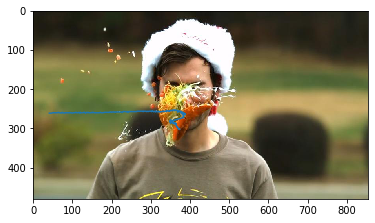

In [110]:
%matplotlib inline 
from skimage import io, data, color
import numpy as np
import cv2
import glob
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle
import math
tracking_line=[]



    
def calculateDistance(x1,y1,x2,y2):  
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
    return dist 

def get_center_of_bounding_box(path):
    image = io.imread(path)
    lowe_bound=np.array([150, 50,0])
    upper_bound=np.array([255,150, 25])
    binary_output = cv2.inRange(image, lowe_bound, upper_bound)
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(binary_output,kernel,iterations = 1)
    dilation = cv2.dilate(erosion,kernel,iterations = 1)
    labeled_components=np.copy(dilation)
    ret, labels = cv2.connectedComponents(labeled_components)
    label_ids=np.unique(labels)
  
    components_center=[]
    for i in range(1, label_ids.size):
        indexes = np.where(labels == label_ids[i])
        if (indexes[0].size > 0 and indexes[1].size > 0):
            min_i = np.amin(indexes[0])
            min_j = np.amin(indexes[1])
            max_i = np.amax(indexes[0])
            max_j = np.amax(indexes[1])
            width = max_i - min_i + 1
            height = max_j - min_j + 1
            center_x=min_i+int(width/2)
            center_y=min_j+int(height/2)
            components_center.append((center_x,center_y,width*height))
    return components_center

tracking_list=[]
for filename in glob.glob('images/taco/*.jpg'):
    result=get_center_of_bounding_box(filename)  
    #first image get the biggest bounding box 'Taco piece'
    if "001.jpg" in  filename:
        size=0
        center_x=0
        center_y=0
        for element in result:
            if(element[2]>size):
                size=element[2]
                center_x=element[0]
                center_y=element[1]
        tracking_list.append((center_x,center_y))
    # store in the tracking list the closest point to the last point in the list
    else:
        center_x=0
        center_y=0
        last_center_x=tracking_list[-1][0]
        last_center_y=tracking_list[-1][1]
        distance=10000
        for element in result:
            temp_distance=calculateDistance(last_center_x,last_center_y,element[0],element[1])
            if(temp_distance<distance):
                distance=temp_distance
                center_x=element[0]
                center_y=element[1]
        tracking_list.append((center_x,center_y))
                

x_list = [x[0] for x in tracking_list]
y_list = [x[1] for x in tracking_list]
image = io.imread('images/taco/220.jpg')
plt.plot(y_list,x_list)    
plt.imshow(image)  
plt.show()  
#draw_bounding_box('images/taco/001.jpg')



